# Analog to Digital Converters (ADCs)

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import time
from matplotlib import pyplot as plt

In [2]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return array[idx]

# Making our adc function! This is not the most efficient way of doing it, but I hope it's easier to understand.
def adc1(signal, num_bits, input_range):
    # A function to digitise an analogue signal
        # Signal is a list or 1D array of all the values
        # num_bits is the number of bits (1s or zeros) we will have in our ADC
        # input_range is the range of inputs we will allow, as a tuple (min, max)
    
    # Extract the min and max values from the input range
    sig_min, sig_max = input_range
    # Generate the discrete levels that our ADC is going to map the real signal to
    disc_levels = np.linspace(sig_min, sig_max, 2**num_bits)
    print(disc_levels)
    
    # For each element in the signal, match it to the closest discrete level:
    out = list() # Create an empty output array
    for i in signal:
        out.append(find_nearest(disc_levels,i))
        
    return out
    

[-1.         -0.33333333  0.33333333  1.        ]


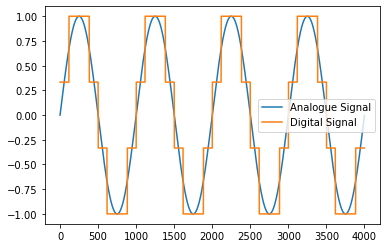

In [11]:
# We have made a BASIC digitiser - check it out above.
# Let's test it out using a sinusoid
samples = 1000
timebase = np.arange(0, 8*np.pi, 2*np.pi/samples)
signal = np.sin(timebase)
plt.plot(signal,'-')

plt.plot(adc1(signal, 2, (-1,1)),'-')
plt.legend(["Analogue Signal", "Digital Signal"])

**Homework:**

1. Play around with the bit depth and the range - try poorly optimised values and see how that affects the digitised signal.
2. Take a look at [Michael's Notes](https://github.com/phys3112/intro/blob/master/mcba3-analog-to-digital-conversion.ipynb) and modify the ADC to add noise to the signal - then also write something to average these noisy values into a 'smoother' digital output!

# Random number generators

My random number generator formula (a bit more readable than code)
$$ Random(value,maximum) = (13 \times value + 2^{12} - 1) \ \% \ maximum $$

In [4]:
def my_random(current_value, maximum):
    return int( np.mod(13*current_value + 2**12 - 1 , maximum)) # same fromat as LCG but numbers arn't chosen well

Text(0.5, 0, 'Sequence number')

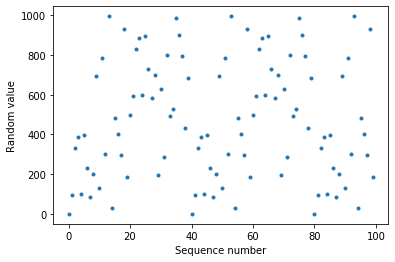

In [13]:
maximum = 1000
starter_value = 0

# make some random numbers
num_vals = 100
vals = list()
curr_val = 0
for i in range(num_vals):
    vals.append(curr_val)
    curr_val = my_random(curr_val, maximum)
    
# Lets have a look at the numbers
plt.plot(vals,'.')
plt.ylabel("Random value")
plt.xlabel("Sequence number")

In [6]:
# Use time as a seed so that it repeats less predictably
time.time_ns()

1615157690376978100

**Homework**

Write your own implementation of any random number generator. You may wish to take a look at [Michael's Notes](https://github.com/phys3112/intro/blob/master/mcba6-random-numbers.ipynb). The challenge here is to see how random your random number generator is; save the output to a file and attempt to compress it! If you can't reduce the file size, then you're doing a good job!

# Fourier transforms

In [7]:
from scipy import signal
import scipy.fftpack

length: 600


Text(0.5, 0, 'Time (s)')

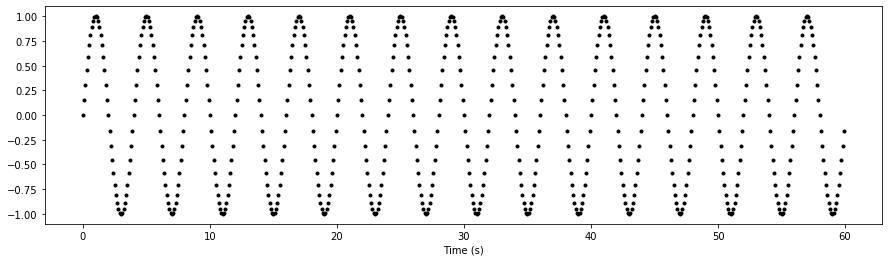

In [8]:
# Lets make the function we will be transforming

# Generate our timebase
timestep = 0.1 # sec

finaltime = 60 # sec
steps = int(finaltime/timestep)

timebase = np.arange(0,finaltime,timestep) 
print("length: " + str(len(timebase)))

frequency = 0.5*np.pi # rad/sec

my_signal = np.sin(timebase*frequency) # Generate our sinusoid, and plot it!

# frequency2 = 1.1*np.pi
# my_signal = np.sin(timebase*frequency) + np.sin(timebase*frequency2)

# my_signal =  sp.signal.square(0.2*timebase)

plt.figure(figsize=(15, 4))
plt.plot(timebase, my_signal,'k.')
plt.xlabel('Time (s)')

[ 1.95971371e-14-0.00000000e+00j  1.08381518e-14+1.31197211e-14j
 -3.43199060e-15+2.00511537e-14j  1.06680411e-14+1.14713281e-14j
 -5.81103626e-15-1.64658429e-14j]


Text(0.5, 0, 'Frequency (Hz)')

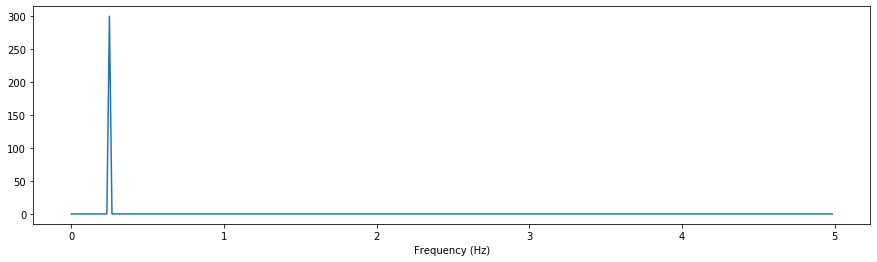

In [9]:
fftsignal = sp.fftpack.fft(my_signal) # Doing the fourer transform
print(fftsignal[0:5])

freqbase = sp.fftpack.fftfreq(steps, d=timestep) # Generates our frequency base

fftsignal = np.abs(fftsignal) # Step 1 - take the absolute value of our fourier transform
fftsignal = fftsignal[:steps//2] # Step 2 - take only the second half of our fourier transform (it's mirrored about f = 0) 
freqbase = freqbase[:steps//2]

plt.figure(figsize=(15, 4))
lastidx = 9999 # using this to zoom in on the graph
plt.plot(freqbase[0:lastidx], fftsignal[0:lastidx])
plt.xlabel('Frequency (Hz)')

In [10]:
fourier = pd.DataFrame({ "Mag" : fftsignal, "Freq" : freqbase})
fourier.sort_values(by=['Mag'], ascending = False) # Finding the peaks

,Mag,Freq
15,3.000000e+02,0.250000
135,2.889671e-13,2.250000
105,2.785807e-13,1.750000
104,2.415575e-13,1.733333
134,2.363002e-13,2.233333
...,...,...
183,5.391001e-15,3.050000
185,5.115130e-15,3.083333
269,4.741892e-15,4.483333
193,3.772127e-15,3.216667


**Homework**

1. Try out some other input signals (maybe some real data)
2. Try out an inverse fourier transform
3. Have a look at 2d fourier transforms (they are pretty cool)